<a href="https://colab.research.google.com/github/Pasindusameera/Deep_learning_Basics/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### Download dataset from Kaggle

In [ ]:
!pip install opendatasets -q

In [ ]:
import opendatasets as od

Dataset Link: https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight

In [ ]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pasinduperera878
Your Kaggle Key: ··········


100%|██████████| 20.3k/20.3k [00:00<00:00, 25.1MB/s]

In [ ]:
data = pd.read_csv("male-female-height-and-weight/Test set.csv")

In [ ]:
# # load downloaded dataset
# data = pd.read_csv("dataset.csv")

### Data Preprocessing

In [ ]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [ ]:
data.loc[data['Sex']=='Male','Sex']=1
data.loc[data['Sex']=='Female','Sex']=0

In [ ]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [ ]:
X = data.drop(['Sex'], axis=1)
y = data['Sex']

In [ ]:
X.head()

,Height,Weight
0,146.323241,59.861065
1,175.695412,77.863687
2,183.216164,72.131992
3,184.245269,77.546000
4,132.302261,55.188496


In [ ]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  205 non-null    float64
 1   Weight  205 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [ ]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: object

In [ ]:
y.dtype

dtype('O')

In [ ]:
y = y.astype('int')

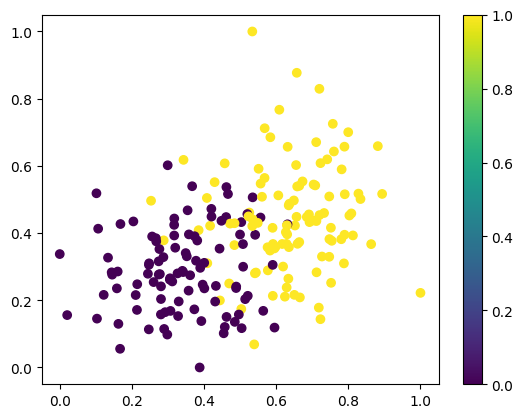

In [ ]:
plt.scatter(X['Height'], X['Weight'], c=y)
plt.colorbar()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((164, 2), (41, 2))

### Model Building

#### OPTION 1

In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["accuracy"])

# train the model
epoch_number = 10
history = model.fit(X_train, y_train, epochs=epoch_number)

Epoch 1/10
6/6 [==============================] - 1s 3ms/step - loss: 0.6853 - accuracy: 0.4634
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.5854
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.5385 - accuracy: 0.8110
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.8415
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 0.3606 - accuracy: 0.8354
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8354
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.8476
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.2850 - accuracy: 0.8720
Epoch 9/10
6/6 [==============================] - 0s 4ms/step - loss: 0.3143 - accuracy: 0.8598
Epoch 10/10
6/6 [==============================] - 0s 3ms/step - loss: 0.3640 - accuracy: 0.8110


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               384       
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9697 (37.88 KB)
Trainable params: 9697 (37.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 [==============================] - 0s 5ms/step


array([[0.32738626],
       [0.9951024 ],
       [0.99786574],
       [0.54717857],
       [0.99404126]], dtype=float32)

In [ ]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

#### OPTION 2

In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["accuracy"])

# train the model
epoch_number = 10
history = model.fit(X_train, y_train, epochs=epoch_number)

Epoch 1/10
6/6 [==============================] - 1s 3ms/step - loss: 0.6665 - accuracy: 0.5610
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 0.5493 - accuracy: 0.7561
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8110
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8598
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8293
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 0.3199 - accuracy: 0.8354
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 0.2982 - accuracy: 0.8720
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.3457 - accuracy: 0.8354
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 0.2992 - accuracy: 0.8659
Epoch 10/10
6/6 [==============================] - 0s 3ms/step - loss: 0.2898 - accuracy: 0.8780


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 2)                 34        
                                                                 
Total params: 9714 (37.95 KB)
Trainable params: 9714 (37.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 [==============================] - 0s 4ms/step


array([[0.92428285, 0.07571706],
       [0.01951671, 0.9804833 ],
       [0.0084674 , 0.99153256],
       [0.87835056, 0.12164947],
       [0.04140495, 0.9585951 ]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([0, 1, 1, 0, 1])

In [ ]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

### Evaluate Model

In [ ]:
# Using evaluate method
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.2494 - accuracy: 0.9024


[0.24937671422958374, 0.9024389982223511]

In [ ]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8636364>

In [ ]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

### Variation of loss and accuracy

<Axes: >

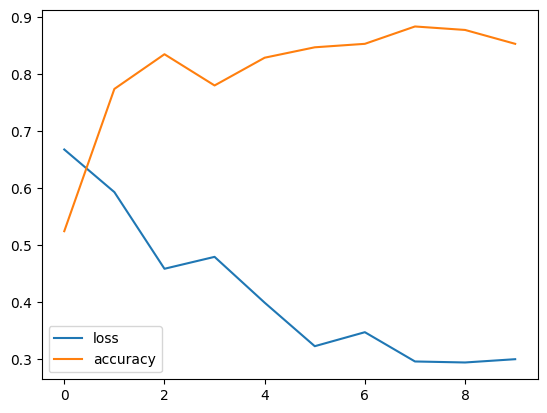

In [ ]:
pd.DataFrame(history.history).plot()